In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`


In [3]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Fuel Efficiency Distribution')

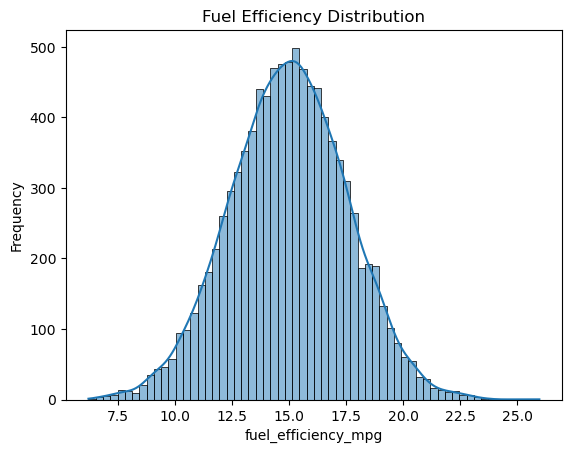

In [4]:
sns.histplot(df['fuel_efficiency_mpg'],kde=True)
plt.ylabel('Frequency')
plt.title('Fuel Efficiency Distribution')

There is not tail in this distribution. It is a normal distribution.

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [ ]:
df.isnull().sum()

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [5]:
df['horsepower'].median()

149.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use the same code as in the lectures

In [6]:
# size of each data-set
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [7]:
#shuffling the data
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffle = df.iloc[idx]

In [8]:
# splitting the data
df_train = df_shuffle.iloc[:n_train].reset_index(drop=True)
df_val = df_shuffle.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test = df_shuffle.iloc[n_train+n_val:].reset_index(drop=True)

In [9]:
# original values from the target
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [10]:
# To avoid accidentally using the target variable
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [ ]:
df_train.columns

In [11]:
base_feat = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_x(df: pd.DataFrame, na_values: float):
    df_num = df[base_feat]
    df_num = df_num.fillna(na_values)

    X = df_num.values

    return X

In [12]:
def train_linear_regression(X: np.ndarray, y: np.ndarray):
    X0 = np.ones(X.shape[0])
    X = np.column_stack([X0, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y) # remember

    return w[0], w[1:]

In [13]:
def rmse(y_actual: np.ndarray, y_pred: np.ndarray):
    se = (y_actual - y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse

#### Linear Regression (Mean)

In [14]:
mean = df_train['horsepower'].mean()

X_train = prepare_x(df_train, na_values=mean)
w0, w = train_linear_regression(X_train, y_train) 

w0, w

(28.92525995213697,
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [15]:
X_val = prepare_x(df_val, na_values=mean)

y_mean_predict = w0 + X_val.dot(w)

mean_score = round(rmse(y_val, y_mean_predict),2)
mean_score

0.46

#### Linear Regression (Zero)

In [16]:
X_train = prepare_x(df_train, na_values=0)

w0, w = train_linear_regression(X_train, y_train)

w0, w

(28.82736547433862,
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [17]:
X_val = prepare_x(df_val, na_values=0)

y0_predict = w0 + X_val.dot(w)

zero_score = round(rmse(y_val, y0_predict),2)
zero_score

0.52

c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spradkyl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


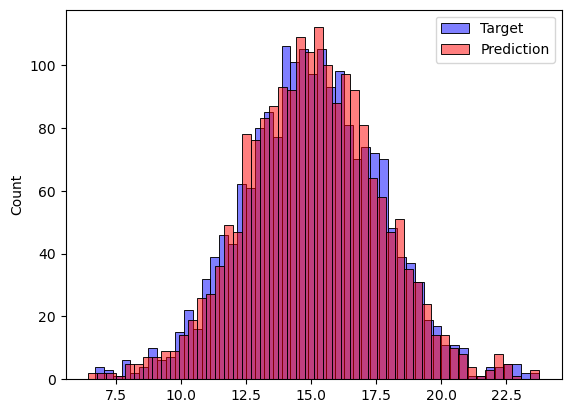

In [18]:
sns.histplot(y_val, label='Target' , color='blue', alpha=0.5, bins=50)
sns.histplot(y_mean_predict, label='Prediction' , color='red', alpha=0.5, bins=50)
plt.legend()

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [19]:
def train_linear_regression_reg(X: np.ndarray, y: np.ndarray, alpha: float = 0):
    X0 = np.ones(X.shape[0])
    X = np.column_stack([X0, X])

    XTX = X.T.dot(X)
    XTX = XTX + alpha * np.eye(XTX.shape[0]) # remember

    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y) # remember

    return w[0], w[1:]

In [20]:
for a in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, alpha=a)
    y_val_pred = w_0 + X_val.dot(w)
    rmse_val = np.round(rmse(y0_predict, y_val),2)
    print(f'alpha = {a:<4}  |  RMSE = {rmse_val}')
    

alpha = 0     |  RMSE = 0.52
alpha = 0.01  |  RMSE = 0.52
alpha = 0.1   |  RMSE = 0.52
alpha = 1     |  RMSE = 0.52
alpha = 5     |  RMSE = 0.52
alpha = 10    |  RMSE = 0.52
alpha = 100   |  RMSE = 0.52


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [35]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    #set each seed at the start of each loop
    np.random.seed(seed)

    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffle = df.iloc[idx]
    df_train = df_shuffle.iloc[:n_train].reset_index(drop=True)
    df_val = df_shuffle.iloc[n_train:n_train + n_val].reset_index(drop=True)
    df_test = df_shuffle.iloc[n_train+n_val:].reset_index(drop=True)

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values

    X_train = prepare_x(df_train, na_values=0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_x(df_val, na_values=0)
    y_pred  = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    
    rmse_scores.append(score)

    print(f'Seed:{seed} -> RMSE Score: {round(score,3)}')

    

Seed:0 -> RMSE Score: 0.521
Seed:1 -> RMSE Score: 0.521
Seed:2 -> RMSE Score: 0.523
Seed:3 -> RMSE Score: 0.516
Seed:4 -> RMSE Score: 0.511
Seed:5 -> RMSE Score: 0.528
Seed:6 -> RMSE Score: 0.531
Seed:7 -> RMSE Score: 0.509
Seed:8 -> RMSE Score: 0.515
Seed:9 -> RMSE Score: 0.513


In [36]:
round(np.std(rmse_scores), 5)

0.00699

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5